In [ ]:
#!pip install openpyxl
#!pip install plotly
#!pip install --upgrade nbformat

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from pySankey.sankey import sankey

In [28]:
#read excel 
df_day1 = pd.read_excel('control_trashcan.xlsx', sheet_name='DAY 1')
df_day2 = pd.read_excel('control_trashcan.xlsx', sheet_name='DAY 2')
df_day3 = pd.read_excel('control_trashcan.xlsx', sheet_name='DAY 3')
df_day4 = pd.read_excel('control_trashcan.xlsx', sheet_name='DAY 4')
df_day5 = pd.read_excel('control_trashcan.xlsx', sheet_name='DAY 5')



In [29]:
# create column called day and assign the day number to each dataframe
df_day1['day'] = 1
df_day2['day'] = 2
df_day3['day'] = 3
df_day4['day'] = 4
df_day5['day'] = 5


In [30]:
#drop column called 'Unnamed: 2'
df_day1 = df_day1.drop(columns='Unnamed: 2')
df_day2 = df_day2.drop(columns='Unnamed: 2')
df_day3 = df_day3.drop(columns='Unnamed: 2')
df_day4 = df_day4.drop(columns='Unnamed: 2')
df_day5 = df_day5.drop(columns='Unnamed: 2')


In [31]:
# drop rows with null values
df_day1 = df_day1.dropna()
df_day2 = df_day2.dropna()
df_day3 = df_day3.dropna()
df_day4 = df_day4.dropna()
df_day5 = df_day5.dropna()


In [32]:
#concatenate all dataframes
df = pd.concat([df_day1, df_day2, df_day3, df_day4, df_day5])
df

,Predicted,Real,day
0,blue,yellow,1
1,blue,yellow,1
2,yellow,yellow,1
3,yellow,yellow,1
4,yellow,yellow,1
...,...,...,...
19,brown,blue,5
20,brown,blue,5
21,brown,blue,5
22,brown,yellow,5


In [33]:
#strip all the values in real
df['Real'] = df['Real'].str.strip()
df["Predicted"] = df["Predicted"].str.strip()

In [34]:
#df.to_csv('raw_control_trashcan.csv', index=False)

In [9]:
#get yellow, blue and brown counts for each day
df.groupby('day').apply(lambda x: x['Predicted'].value_counts())

/tmp/ipykernel_13575/4177183602.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('day').apply(lambda x: x['Predicted'].value_counts())


day  Predicted
1    yellow        6
     blue          2
2    blue         12
     yellow       11
     brown         1
3    blue          8
     yellow        2
     brown         2
4    yellow        9
     blue          8
     brown         4
5    brown        11
     yellow        7
     blue          6
Name: count, dtype: int64

In [10]:
#get yellow, blue and brown counts for each day
df.groupby('day').apply(lambda x: x['Real'].value_counts())

/tmp/ipykernel_13575/3252356601.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('day').apply(lambda x: x['Real'].value_counts())


day  Real  
1    yellow     6
     brown      1
     blue       1
2    yellow    10
     blue       8
     brown      6
3    yellow     6
     brown      3
     blue       3
4    brown      8
     yellow     7
     blue       6
5    brown     12
     blue       6
     yellow     6
Name: count, dtype: int64

In [11]:
df["Predicted"].value_counts()

Predicted
blue      36
yellow    35
brown     18
Name: count, dtype: int64

In [13]:
df["Real"].value_counts()

Real
yellow    35
brown     30
blue      24
Name: count, dtype: int64

In [8]:
# new column called 'correct' to check if the predicted value is correct
df['correct'] = np.where(df['Real'] == df['Predicted'], 1, 0)

In [9]:
#calculate mean of correct values
mean_correct = df['correct'].mean()
mean_correct

np.float64(0.47191011235955055)

In [10]:
# calculate the mean correct for each day
df.groupby('day')['correct'].mean()

day
1    0.500000
2    0.458333
3    0.416667
4    0.476190
5    0.500000
Name: correct, dtype: float64

# Type I and Type II Error

In [18]:
# Type I Error for yellow: When the predicted value is "yellow", but the actual value is not "yellow".
type_i_error_yellow = df[(df['Predicted'] == 'yellow') & (df['Real'] != 'yellow')]
type_i_error_blue = df[(df['Predicted'] == 'blue') & (df['Real'] != 'blue')]
type_i_error_brown = df[(df['Predicted'] == 'brown') & (df['Real'] != 'brown')]


In [19]:
#Type II Error for yellow: When the real value is "yellow", but the predicted value is not "yellow".
type_ii_error_yellow = df[(df['Real'] == 'yellow') & (df['Predicted'] != 'yellow')]
type_ii_error_blue = df[(df['Real'] == 'blue') & (df['Predicted'] != 'blue')]
type_ii_error_brown = df[(df['Real'] == 'brown') & (df['Predicted'] != 'brown')]


In [20]:
# Type I error Yellow
type_i_error_yellow.groupby('day').size()

day
1    2
2    5
4    3
5    3
dtype: int64

In [21]:
#type I error Blue
type_i_error_blue.groupby('day').size()

day
1    2
2    7
3    6
4    6
5    4
dtype: int64

In [22]:
#type I error Brown
type_i_error_brown.groupby('day').size()

day
2    1
3    1
4    2
5    5
dtype: int64

In [23]:
#type II error Yellow
type_ii_error_yellow.groupby('day').size()

day
1    2
2    4
3    4
4    1
5    2
dtype: int64

In [24]:
#type II error Blue
type_ii_error_blue.groupby('day').size()

day
1    1
2    3
3    1
4    4
5    4
dtype: int64

In [25]:
#type II error Brown
type_ii_error_brown.groupby('day').size()

day
1    1
2    6
3    2
4    6
5    6
dtype: int64

In [18]:
#sankey diagram between predictted and real of df
fig = px.sunburst(df, path=['Predicted', 'Real'])
# put titles and labels
fig.update_layout(title='Predicted vs Real')
fig.update_xaxes(title_text='Predicted')
fig.update_yaxes(title_text='Real')
fig.show()


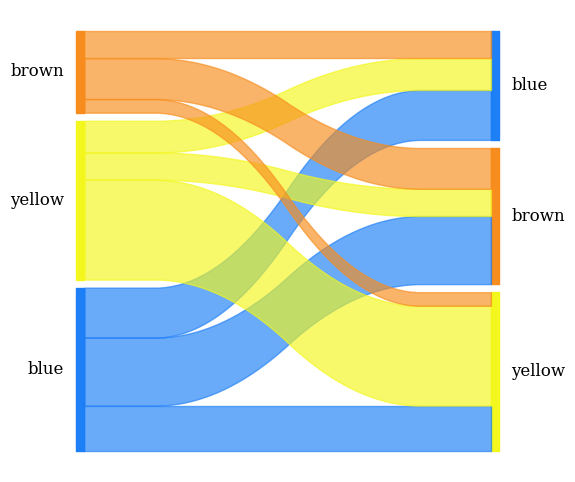

In [22]:
colors = {
    "apple": "#f71b1b",
    "blue": "#1b7ef7",
    "yellow": "#f3f71b",
    "lime": "#12e23f",
    "brown": "#f78c1b",
    "nonthrown": "#000000",
    "nonclassified": "#000000",
}

sankey(df["Predicted"], df["Real"], aspect=20, colorDict=colors, fontsize=12)